<a href="https://colab.research.google.com/github/Itzz-Hashan/Client-Prediction-System/blob/main/CM2604/CLIENT_PREDICTION_20230657.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# ML Coursework



##Data preproccesing

###Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


###Separate columns in dataset

In [ ]:
df = pd.read_csv('bank-additional-full.csv',delimiter=';')  #Data set read from the CSV file and break in to columns

new_file = ('new_bank-additional-full.csv')
df.to_csv(new_file,index=False)

print(f"Dataset saved as {new_file}")  #save dataset in to the new CSV file

Dataset saved as new_bank-additional-full.csv


###Data importing

In [ ]:
df = pd.read_csv('new_bank-additional-full.csv')  #import the data from last saved new file

df.sample(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7843,30,services,married,high.school,no,no,no,telephone,jun,mon,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
39040,63,technician,married,unknown,no,yes,no,cellular,dec,mon,...,2,999,1,failure,-3.0,92.713,-33.0,0.715,5023.5,yes
16672,57,blue-collar,married,basic.6y,unknown,yes,no,cellular,jul,wed,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
23030,40,technician,divorced,professional.course,no,yes,no,cellular,aug,tue,...,8,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
10235,28,admin.,single,unknown,no,yes,no,telephone,jun,mon,...,5,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no
16903,55,blue-collar,married,basic.6y,unknown,unknown,unknown,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
20774,48,admin.,married,university.degree,unknown,yes,yes,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
38324,28,services,married,basic.9y,no,yes,no,telephone,oct,fri,...,1,999,1,failure,-3.4,92.431,-26.9,0.739,5017.5,yes
21981,34,technician,single,university.degree,no,yes,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
28017,30,admin.,married,university.degree,no,yes,no,cellular,apr,thu,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.483,5099.1,yes


###Handaling the duplicates data

In [ ]:
count=df.duplicated().sum() #check how many outliers in the dataset
print(f"Duplicates-{count}")

Duplicates-12


In [ ]:
if count>0:
  duplicates=df[df.duplicated()]
  print(duplicates)  #print the duplicates

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

In [ ]:
df_clean = df.drop_duplicates()
print(f"Dataset without duplicates-{df_clean.shape}")  #display count of without duplicates

Dataset without duplicates-(41176, 21)


###removing unwanted columns

In [ ]:

df= df_clean.drop(['duration', 'default'], axis=1)  #remove the unwanted 2 columns
df.sample(10)

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
33495,42,services,married,basic.6y,no,no,cellular,may,tue,2,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,no
16206,50,entrepreneur,married,university.degree,no,no,cellular,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
19429,32,admin.,single,university.degree,no,no,cellular,aug,wed,5,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,no
6156,26,technician,married,professional.course,no,no,telephone,may,tue,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3063,41,admin.,married,university.degree,yes,no,telephone,may,wed,3,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
724,38,services,married,high.school,yes,no,telephone,may,tue,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8151,30,technician,single,university.degree,no,no,telephone,jun,tue,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
29244,47,management,married,professional.course,yes,no,cellular,apr,fri,2,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
27434,31,student,married,high.school,no,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
10222,29,blue-collar,married,high.school,no,no,telephone,jun,mon,2,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no


In [ ]:

unknown_counts = df.apply(lambda x: x.value_counts().get('unknown', 0))  #check how many number of data "unknow" in the dataset
unknown_counts

,0
age,0
job,330
marital,80
education,1730
housing,990
loan,990
contact,0
month,0
day_of_week,0
campaign,0


###Handling outliers

####Check How many Outliers

In [ ]:
def count_outliers(df): #function to calculate outliers in each numerical column

    outlier_counts = {}
    for col in df.select_dtypes(include=np.number):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]  #identify the outliers in the column
        outlier_counts[col] = len(outliers)
    return outlier_counts


outlier_counts = count_outliers(df)

for col, count in outlier_counts.items():  #print the count of outliers each column
  print(f"Column '{col}': {count} outliers")

Column 'age': 468 outliers
Column 'campaign': 2406 outliers
Column 'pdays': 1515 outliers
Column 'previous': 5625 outliers
Column 'emp.var.rate': 0 outliers
Column 'cons.price.idx': 0 outliers
Column 'cons.conf.idx': 446 outliers
Column 'euribor3m': 0 outliers
Column 'nr.employed': 0 outliers


####Display outliers in a box plot

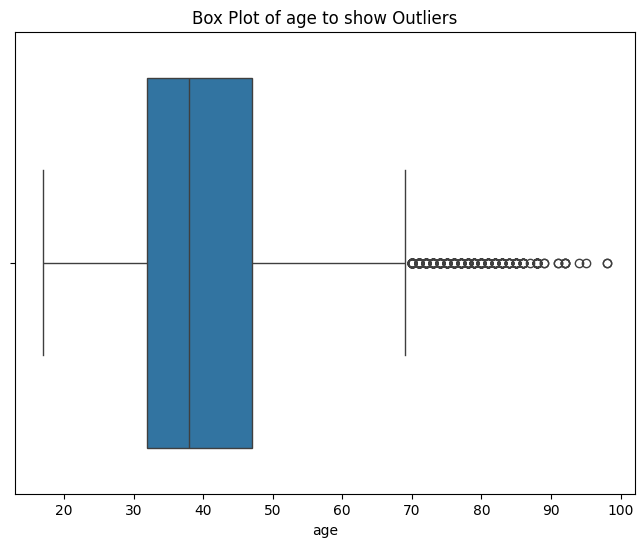

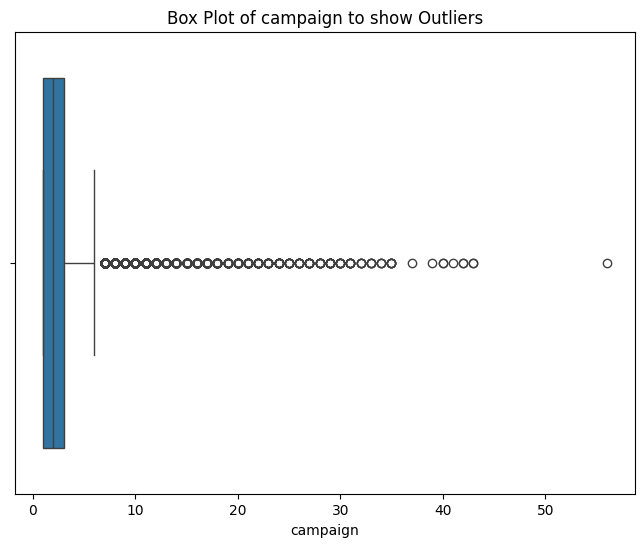

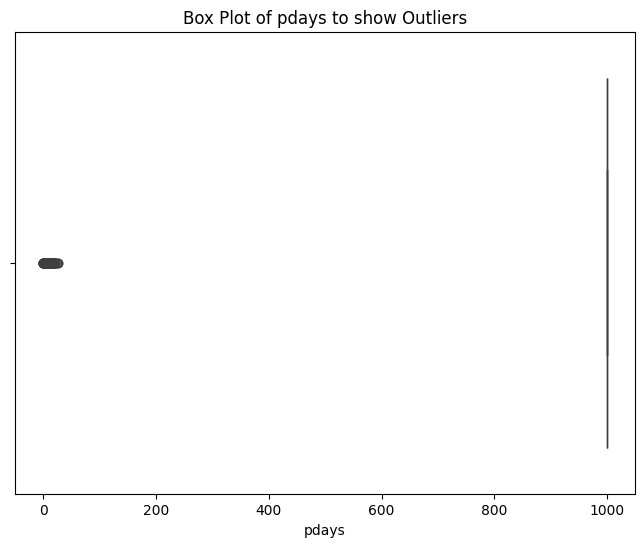

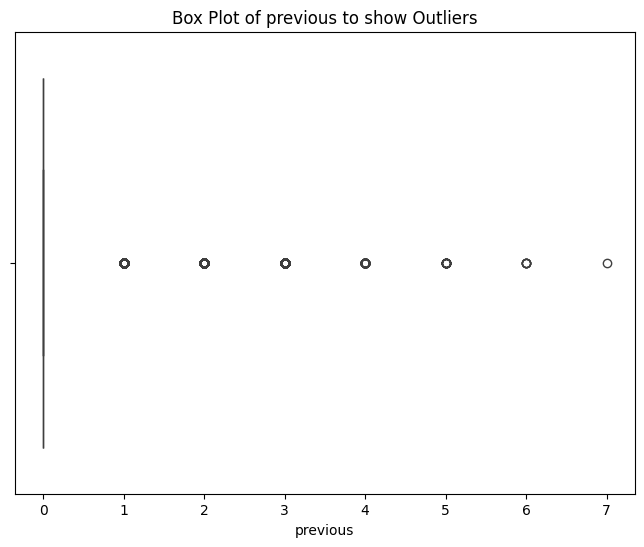

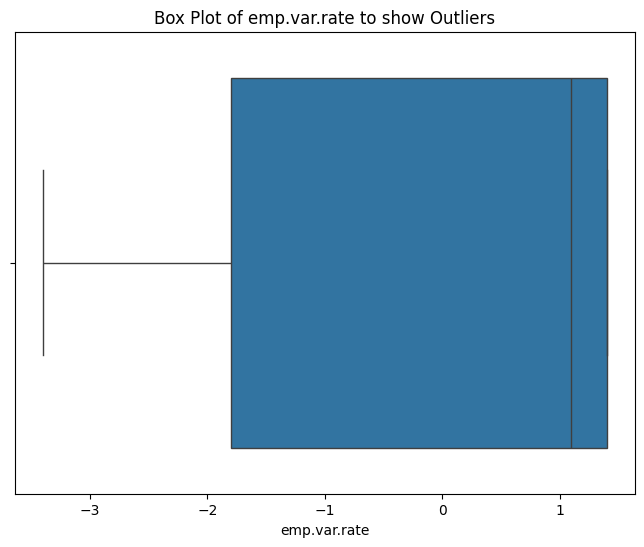

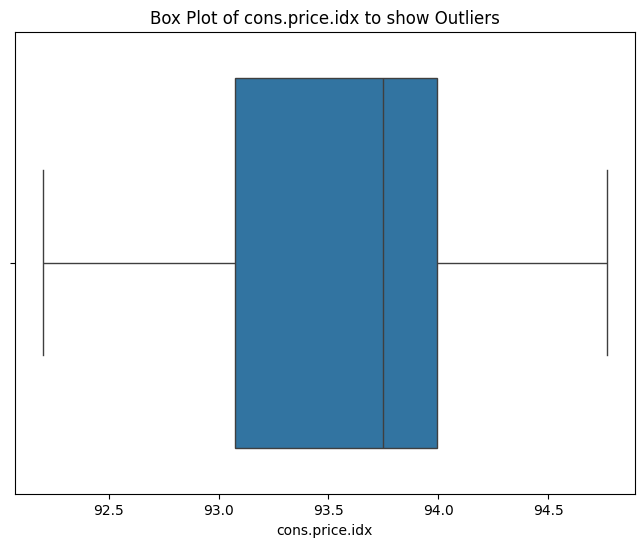

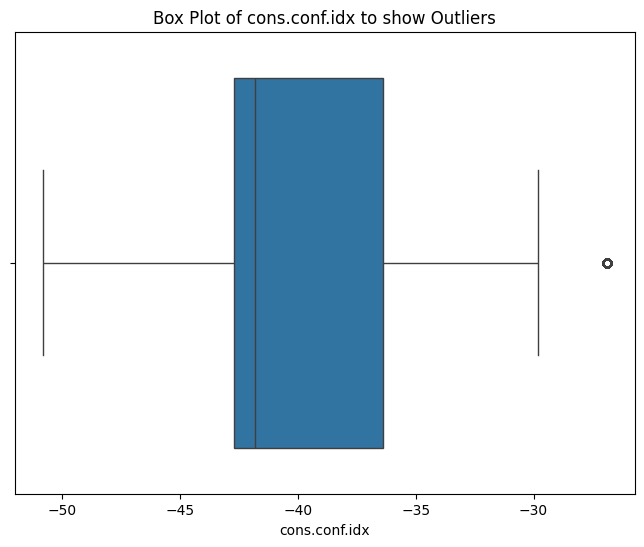

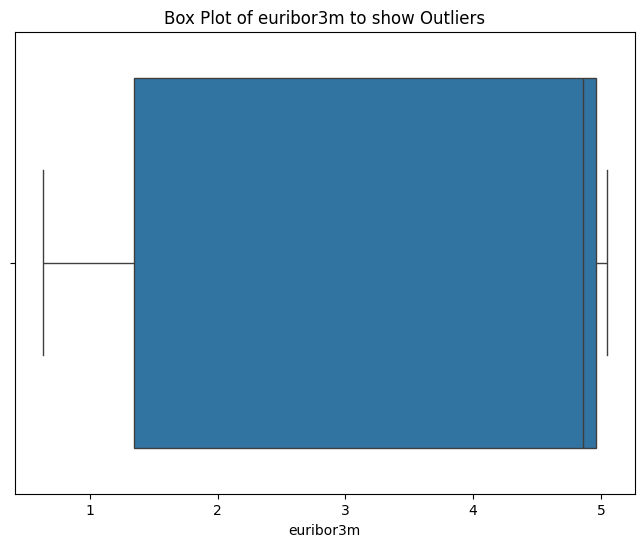

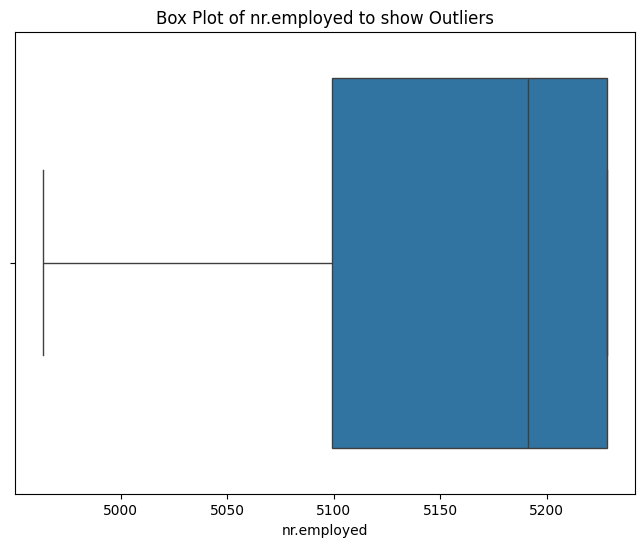

In [ ]:
def display_outliers(df): #function to display outliers in a box plot
    for col in df.select_dtypes(include=np.number):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col} to show Outliers')
        plt.xlabel(col)
        plt.show()

display_outliers(df)

In [ ]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


####Outliers handling

In [ ]:


from sklearn.impute import KNNImputer

def handle_outliers_knn(df, columns): #handle outliers  using KNN imputer


    df_outliers_handled = df.copy()
    imputer = KNNImputer(n_neighbors=5) #KNN imputer with 5 nearest neighbours
    for col in columns:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_outliers_handled[f'{col}_outlier'] = 0
        df_outliers_handled.loc[(df_outliers_handled[col] < lower_bound) | (df_outliers_handled[col] > upper_bound), f'{col}_outlier'] = 1

        df_outliers_handled.loc[(df_outliers_handled[col] < lower_bound) | (df_outliers_handled[col] > upper_bound), col] = np.nan

        df_outliers_handled[col] = imputer.fit_transform(df_outliers_handled[[col]])[:, 0]#apply KNN imputation for replace NaN values


        df_outliers_handled = df_outliers_handled.drop(columns=[f'{col}_outlier'])

    return df_outliers_handled



columns_to_handle = ['age', 'campaign', 'cons.conf.idx']  #handle the outliers in specific columns
df_handled = handle_outliers_knn(df, columns_to_handle)  #calling outliers handle function


print(df_handled.head())

    age        job  marital    education housing loan    contact month  \
0  56.0  housemaid  married     basic.4y      no   no  telephone   may   
1  57.0   services  married  high.school      no   no  telephone   may   
2  37.0   services  married  high.school     yes   no  telephone   may   
3  40.0     admin.  married     basic.6y      no   no  telephone   may   
4  56.0   services  married  high.school      no  yes  telephone   may   

  day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0         mon       1.0    999         0  nonexistent           1.1   
1         mon       1.0    999         0  nonexistent           1.1   
2         mon       1.0    999         0  nonexistent           1.1   
3         mon       1.0    999         0  nonexistent           1.1   
4         mon       1.0    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1 

In [ ]:
print(f"Dataset shape after outlier handling: {df_handled.shape}") #print the count of data after outliers handling

Dataset shape after outlier handling: (41176, 19)


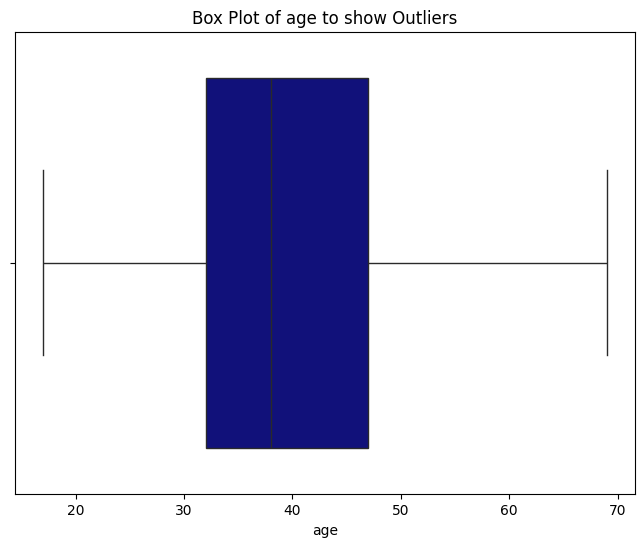

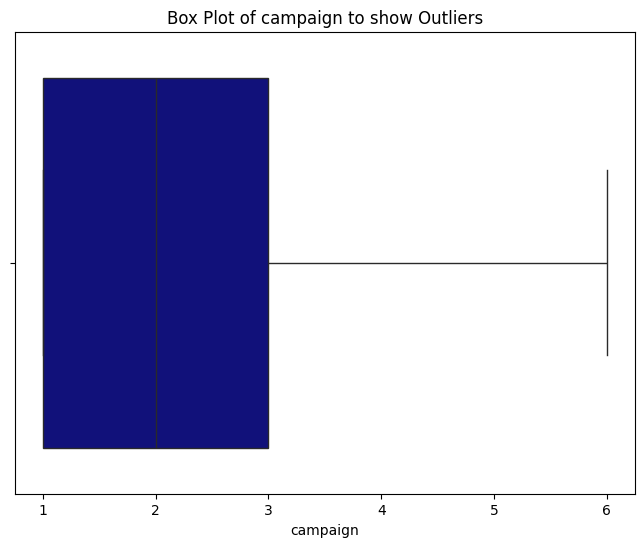

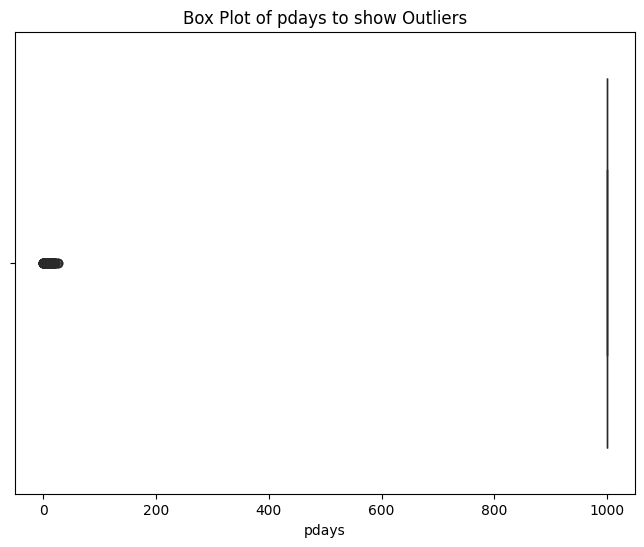

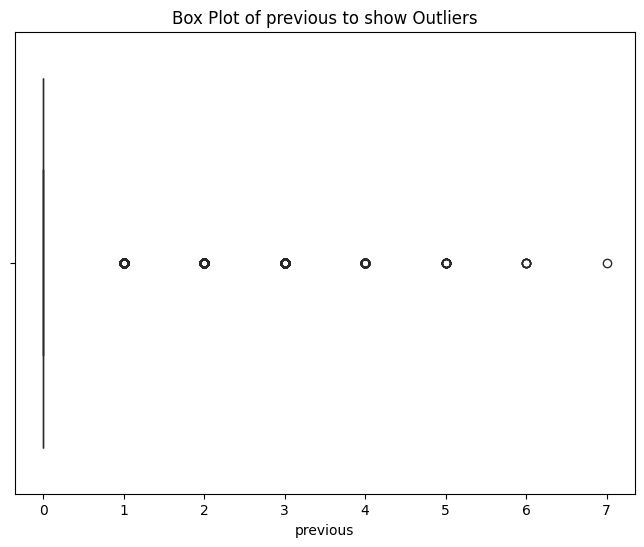

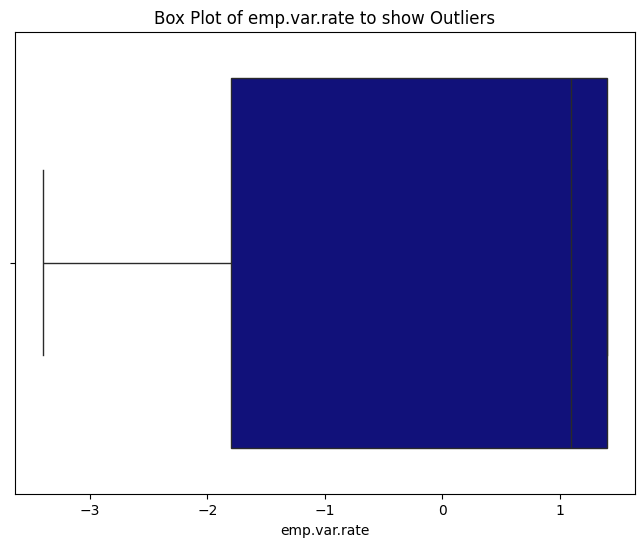

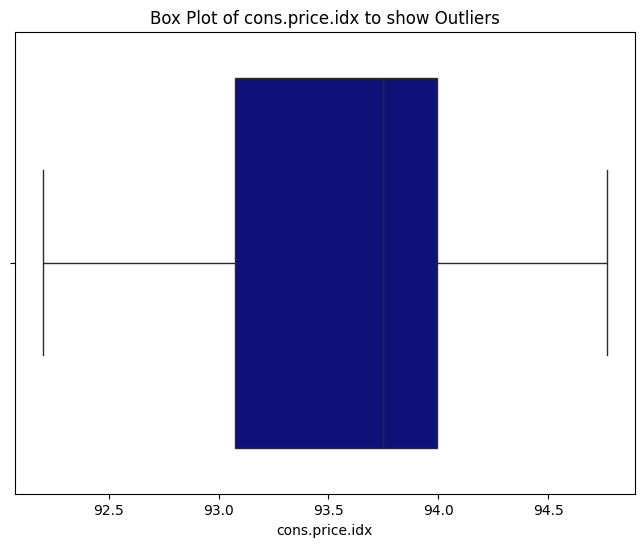

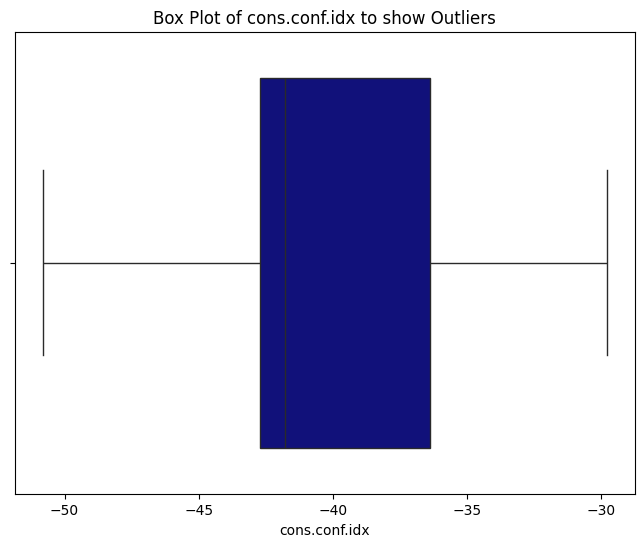

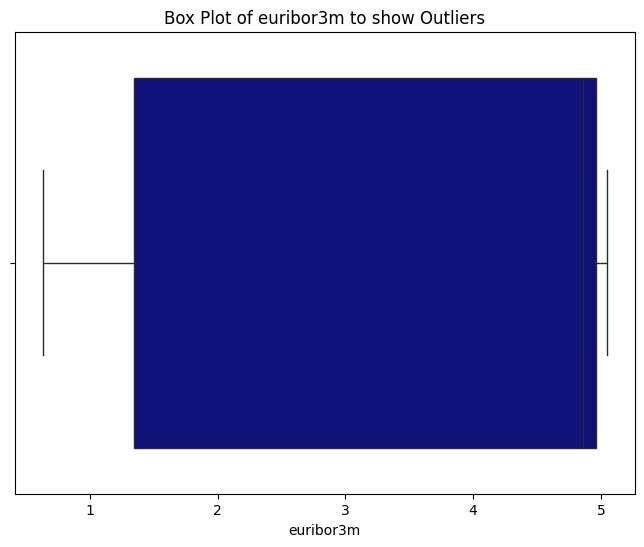

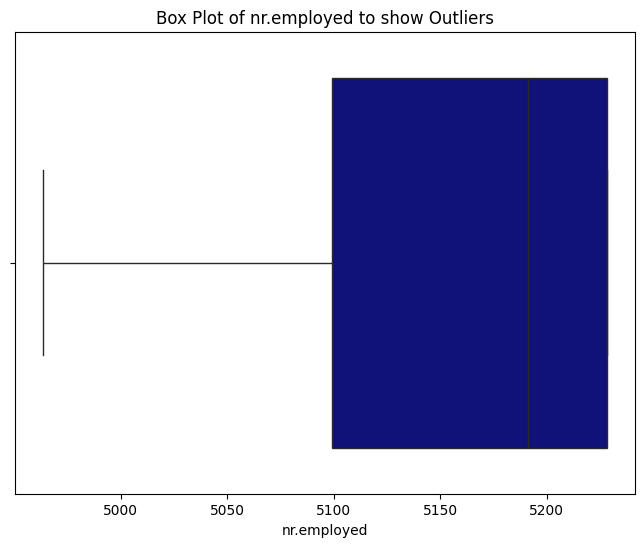

In [ ]:
def display_outliers(df):  #function to display in aboxplot after outliers handling
    for col in df.select_dtypes(include=np.number):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col],color="darkblue")
        plt.title(f'Box Plot of {col} to show Outliers')
        plt.xlabel(col)
        plt.show()

display_outliers(df_handled)

###Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #initialize labelencoder
for col in ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']:
   df_handled[col] = le.fit_transform(df_handled[col])

df_handled  #display dataframe after encode


,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.000000,3,1,0,0,0,1,6,1,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.000000,7,1,3,0,0,1,6,1,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.000000,7,1,3,2,0,1,6,1,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.000000,0,1,1,0,0,1,6,1,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.000000,7,1,3,0,2,1,6,1,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,39.599391,5,1,5,2,0,0,7,0,1.0,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46.000000,1,1,5,0,0,0,7,0,1.0,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.000000,5,1,6,2,0,0,7,0,2.0,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44.000000,9,1,5,0,0,0,7,0,1.0,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


###Correlation metrix display

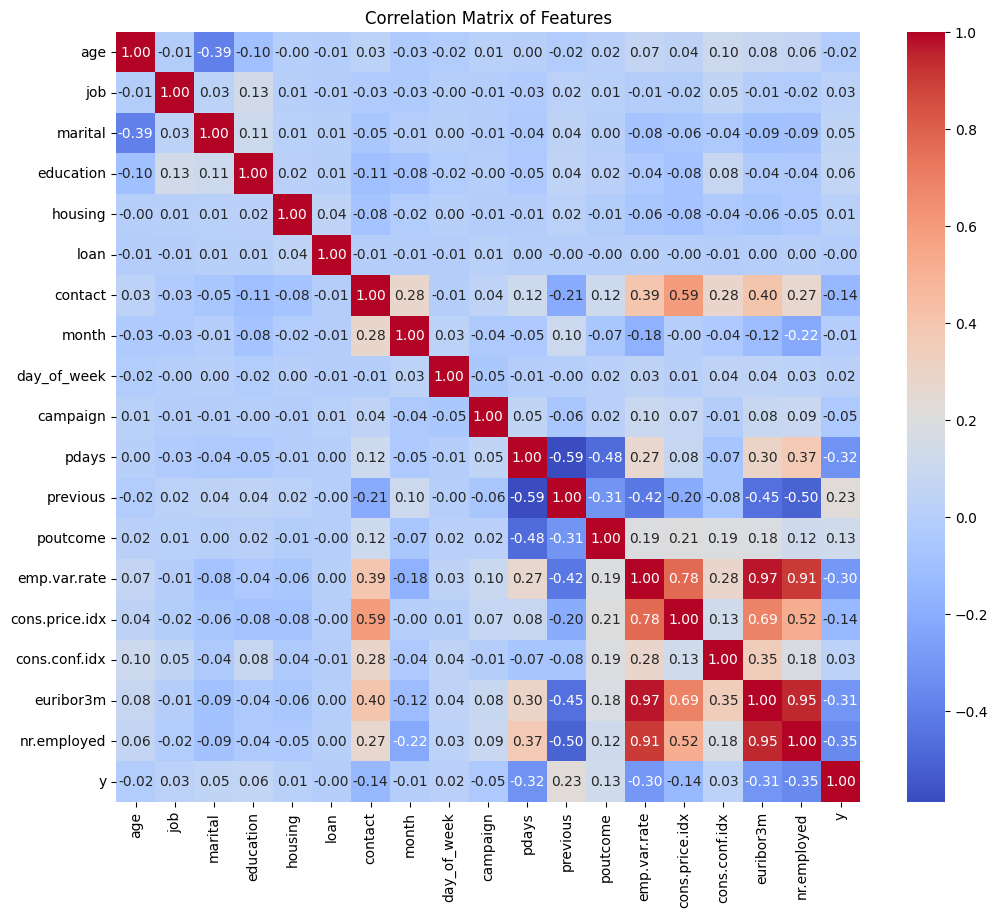

In [ ]:
correlation_matrix = df_handled.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

###Saving Final dataset

In [ ]:
new_file = ('Final_bank-additional-full.csv') #save final dataset in a new CSV file
df_handled.to_csv(new_file,index=False)

print(f"Dataset saved as {new_file}")

Dataset saved as Final_bank-additional-full.csv


##Random Forest Model Training

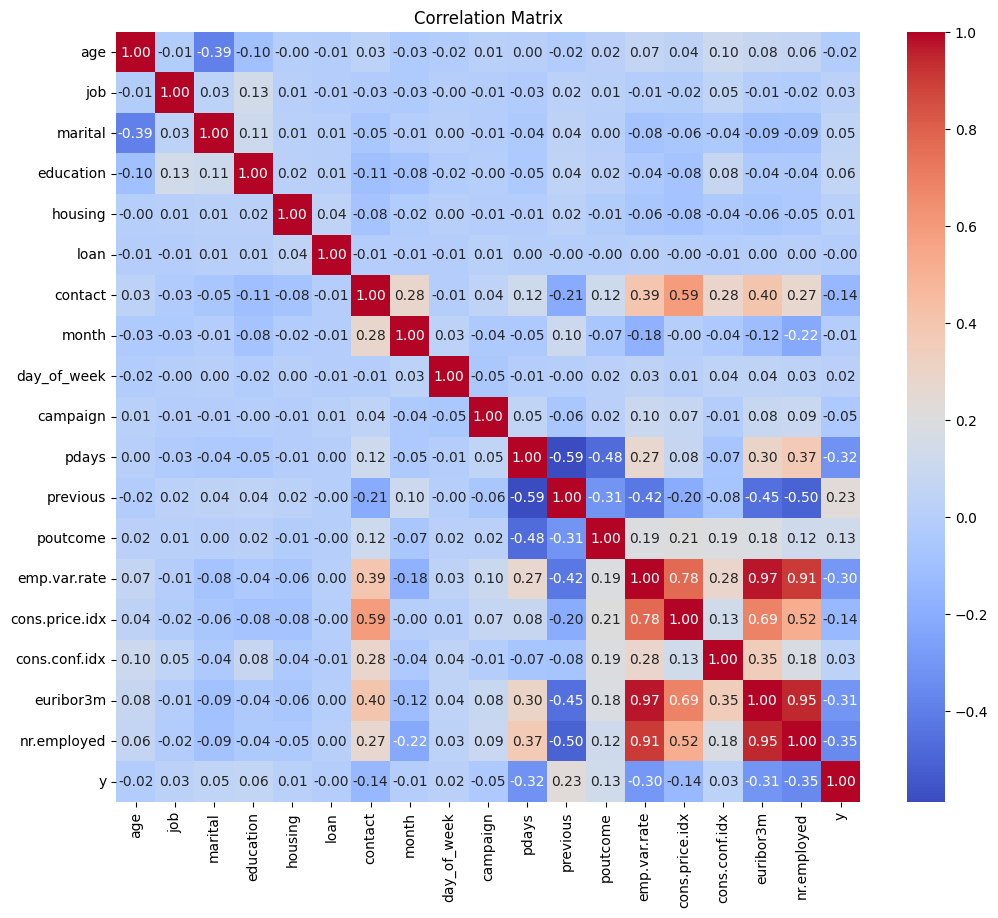

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Training Accuracy: 0.95
Training Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     29272
           1       0.96      0.94      0.95     29272

    accuracy                           0.95     58544
   macro avg       0.95      0.95      0.95     58544
weighted avg       0.95      0.95      0.95     58544

Testing Accuracy: 0.88
ROC AUC Score: 0.78


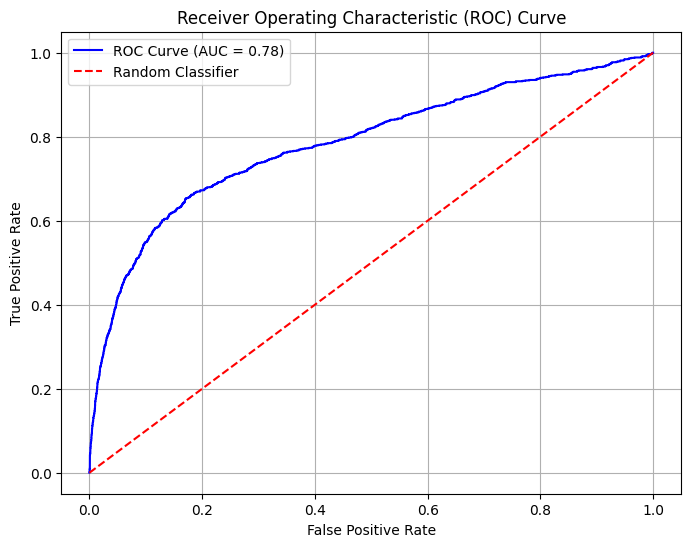

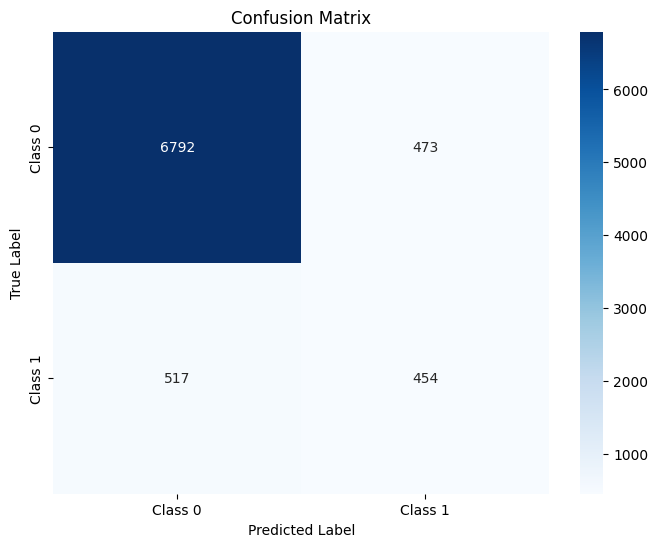

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7265
           1       0.49      0.47      0.48       971

    accuracy                           0.88      8236
   macro avg       0.71      0.70      0.71      8236
weighted avg       0.88      0.88      0.88      8236

ROC Accuracy at Optimal Threshold (Threshold = 0.27): 0.81


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

#import dataset from the preproccesed file
file_path = 'Final_bank-additional-full.csv'
data = pd.read_csv(file_path, delimiter=',')

# Display correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Separate features (X) and target (y)
X = data.drop(columns=['y'])
y = data['y']

# Spliting the dataset to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# apply SMOTE method to balance training dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest model and hyperparameter tuning
rf_model = RandomForestClassifier(
    n_estimators=100,             # trees count
    max_depth=30,                 # depth limit of the tree
    min_samples_split=10,         # minimum samples required to split an internal node
    min_samples_leaf=5,           # minimum samples required at each leaf node
    random_state=42
)

# train  the model
rf_model.fit(X_train_resampled, y_train_resampled)

#predictions on training and testing sets
y_train_pred = rf_model.predict(X_train_resampled)
y_test_pred = rf_model.predict(X_test)

# evaluate  model on training data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# classification report for training data
train_report = classification_report(y_train_resampled, y_train_pred)
print("Training Classification Report:")
print(train_report)

# evaluate  model on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# calculate ROC AUC for testing data
y_test_prob = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot for display ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# dissplay confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# classification report for testing data
report = classification_report(y_test, y_test_pred)
print("Testing Classification Report:")
print(report)

# ROC Accuracy Calculation (using the threshold that gives the highest accuracy)
optimal_threshold = thresholds[np.argmax(tpr - fpr)]  # You can choose an optimal threshold by maximizing the difference between TPR and FPR

# Predictions at optimal threshold
y_test_pred_optimal = (y_test_prob >= optimal_threshold).astype(int)

# calculate accuracy at the optimal threshold
roc_accuracy = accuracy_score(y_test, y_test_pred_optimal)
print(f"ROC Accuracy at Optimal Threshold (Threshold = {optimal_threshold:.2f}): {roc_accuracy:.2f}")
